[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/data/15069540/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 1.1 필요한 라이브러리 불러오기

In [2]:
import pandas as pd #dataframe
import numpy as np #수치계산
import seaborn as sns #시각화

## 1.2 시각화를 위한 폰트 설정

In [3]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False) # - 폰트가 깨지는 문제 해결

# ctrl(cmd) + / : 주석처리 단축키
# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 1.3 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [7]:
%pwd

'c:\\Users\\i\\Desktop\\파이썬으로 시작하는 데이터 사이언스'

In [3]:
df = pd.read_csv(r'data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory= False, encoding='cp949')
df.shape

(91335, 39)

## 1.4 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [22]:
# head 로 데이터를 미리보기 합니다.
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [23]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.170000e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [24]:
# sample로 미리보기를 합니다.
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
28792,23414760,해맑은정신건강의학과,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,4.110000e+24,삼광빌딩,경기도 수원시 팔달구 정조로801번길 3,442022.0,16261.0,NaN,4.0,NaN,127.016347,37.279473


## 1.5 데이터 요약하기

### 1.5.1 요약정보

In [25]:
# info로 데이터의 요약을 봅니다.
df.info() #결측치가 있음을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
지점명          1346 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
표준산업분류코드     86413 non-null object
표준산업분류명      86413 non-null object
시도코드         90956 non-null float64
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null float64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번부번지        72079 non-null float64
지번주소         91335 non-null object
도로명코드        913

### 1.5.2 컬럼명 보기

In [26]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터 타입

In [27]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 1.6 결측치

In [4]:
null_count = df.isnull().sum()


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from c

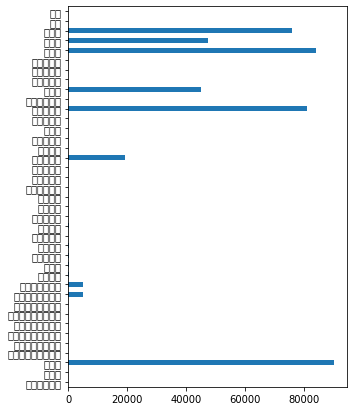

In [5]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 
null_count .plot.barh(figsize=(5,7))

In [6]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.7 컬럼명 변경하기

In [7]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns
df_null_count.columns = ['컬럼명' , '결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.8 정렬하기

In [8]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by='결측치수', ascending = False).head(10)

## 1.9 특정 컬럼만 불러오기

In [9]:
# 지점명 컬럼을 불러옵니다.
# NaN == Not a Number의 약자로 결측치 의미
df[['지점명']].head()

,지점명
0,NaN
1,NaN
2,NaN
3,NaN
4,수지점


In [10]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_count_top['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [11]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기

In [12]:
print(df.shape)
df = df.drop(drop_columns, axis = 1) #axis = 1 : 열 기준 제거
print(df.shape)

(91335, 39)
(91335, 29)


In [61]:
df.info() #열을 제거해서 memory usage가 줄어들었다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null float64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번주소         91335 non-null object
도로명코드        91335 non-null float64
도로명          91335 non-null object
건물본번지        91335 non-null int64
건물관리번호       91335 non-null float64
도로명주소        91335 non-null object
구우편번호        913

## 1.11 기초 통계값 보기

### 1.11.1 기초 통계 수치

In [14]:
df['위도'].dtypes

dtype('float64')

In [15]:
# 평균값
df['위도'].mean()

36.62471119236107

In [16]:
# 중앙값
df['위도'].median()

37.23465232

In [17]:
# 최댓값
df['위도'].max()

38.49965857

In [18]:
# 최솟값
df['위도'].min()

33.21928967

In [19]:
# 개수
df['위도'].count()

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값, 
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [20]:
# 위도를 describe로 요약해 봅니다.
df['위도'].describe()
#25%는 앞에서 1/4 되는 값이고, 1사분위수
#50%는 중앙값이고 2사분위수
#75%는 앞에서 3/4 번째 되는 수, 3사분위수

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [21]:
# 2개의 컬럼을 describe 로 요약합니다.
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [22]:
# describe로 숫자 데이터타입의 요약을 봅니다.
df.describe(include='number')

,상가업소번호,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,도로명코드,건물본번지,건물관리번호,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,9.133500e+04,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32898.381877,3.293232e+09,3.293385e+09,3.293350e+18,1.001336,587.534549,3.293345e+11,251.200482,3.295158e+24,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,12985.393171,1.297387e+09,1.297706e+09,1.297268e+18,0.036524,582.519364,1.297263e+11,477.456487,1.298360e+24,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11110.000000,1.111052e+09,1.111010e+09,1.110000e+18,1.000000,1.000000,1.110000e+11,0.000000,1.110000e+24,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26350.000000,2.635065e+09,2.635011e+09,2.640000e+18,1.000000,162.000000,2.640000e+11,29.000000,2.640000e+24,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41117.000000,4.111758e+09,4.111710e+09,4.110000e+18,1.000000,462.000000,4.110000e+11,92.000000,4.110000e+24,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43113.000000,4.311370e+09,4.311311e+09,4.310000e+18,1.000000,858.000000,4.310000e+11,257.000000,4.310000e+24,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50130.000000,5.013061e+09,5.013032e+09,5.010000e+18,2.000000,7338.000000,5.010000e+11,8795.000000,5.010000e+24,799801.000000,63643.00000,130.909912,38.499659


In [23]:
# describe로 문자열 데이터타입의 요약을 봅니다.
df.describe(include='object')
# top은 가장 높은 빈도로 저장된 데이터, freq는 그 데이터의 빈도수

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


In [24]:
# describe로 모든 데이터 요약을 봅니다.
df.describe(include='all')
# 결측치는 요약하지 않는다.

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
count,9.133500e+04,91335,91335,91335,91335,91335,91335,91335,90956,90956.000000,...,91335,9.133500e+04,91335,91335.000000,9.133500e+04,91335,91323.000000,91333.00000,91335.000000,91335.000000
unique,NaN,56908,1,1,5,5,34,34,17,NaN,...,53118,NaN,16610,NaN,NaN,54031,NaN,NaN,NaN,NaN
top,NaN,리원,S,의료,S01,병원,S02A01,약국,경기도,NaN,...,서울특별시 동대문구 제기동 965-1,NaN,서울특별시 강남구 강남대로,NaN,NaN,서울특별시 동대문구 약령중앙로8길 10,NaN,NaN,NaN,NaN
freq,NaN,152,91335,91335,60774,60774,18964,18964,21374,NaN,...,198,NaN,326,NaN,NaN,198,NaN,NaN,NaN,NaN
mean,2.121818e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32898.381877,...,NaN,3.293345e+11,NaN,251.200482,3.295158e+24,NaN,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12985.393171,...,NaN,1.297263e+11,NaN,477.456487,1.298360e+24,NaN,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11110.000000,...,NaN,1.110000e+11,NaN,0.000000,1.110000e+24,NaN,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26350.000000,...,NaN,2.640000e+11,NaN,29.000000,2.640000e+24,NaN,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41117.000000,...,NaN,4.110000e+11,NaN,92.000000,4.110000e+24,NaN,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43113.000000,...,NaN,4.310000e+11,NaN,257.000000,4.310000e+24,NaN,602811.000000,46044.00000,128.108919,37.507463


### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [ ]:
# "상권업종대분류명"


In [ ]:
# "상권업종중분류명"


In [ ]:
# "상권업종소분류명"


In [ ]:
# nunique 대신 len 을 사용할 수도 있습니다.


### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [ ]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.


In [ ]:
# 시도명을 세어봅니다.


In [ ]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.


In [ ]:
# Pandas 에는 plot기능을 내장하고 있습니다. 
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.


In [ ]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.


In [ ]:
# "상권업종대분류명"으로 갯수를 세어봅니다.


In [ ]:
# "상권업종중분류명"으로 갯수를 세어봅니다.


In [ ]:
# normalize=True 를 사용해 비율을 구해봅니다.


In [ ]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 


In [ ]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.


In [ ]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.


In [ ]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다. 


## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [ ]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.


In [ ]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type


In [ ]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [ ]:
# 유사의료업만 따로 모아봅니다.


In [ ]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.


In [ ]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.


### 여러 조건으로 색인하기

In [ ]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

### 구별로 보기

In [ ]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.


In [ ]:
# normalize=True 를 통해 비율을 구해봅니다.


In [ ]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.


In [ ]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_hospital

In [ ]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.


### 텍스트 데이터 색인하기

In [ ]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.


In [ ]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.


In [ ]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.


### 특정 지역만 보기

In [ ]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul


In [ ]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))


In [ ]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.


In [ ]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))


In [ ]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))


In [ ]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))



## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [ ]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리


In [ ]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.


In [ ]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 


## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시) 
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?